## Checking SN values

Natalie Gosnell  
July 7, 2016

The values calculated straight from the variance didn't seem to hang with the pipeline SN values. This is a quick check for order 113...

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/Natalie/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
sns.set_context('notebook')

In [5]:
!ls -1 ../data/raw/

S1063_o110.fits
S1063_o113.fits
S1063_o115.fits
SDCH_20150425_0064.sn.fits
SDCH_20150425_0064.spec_a0v.fits
SDCH_20150425_0064.variance.fits


#### This is the SN file from the pipeline output

In [6]:
snhdu = fits.open("../data/raw/SDCH_20150425_0064.sn.fits")

In [7]:
snhdu.info()

Filename: ../data/raw/SDCH_20150425_0064.sn.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     181   (2048, 28)   float32   


In [8]:
hdu = fits.open("../data/raw/SDCH_20150425_0064.spec_a0v.fits")

In [9]:
dat = hdu[0]
wav = hdu[1]
sn = snhdu[0]

In [10]:
o110 = 12  
o113 = 15  
o115 = 17

In [11]:
flux113 = dat.data[o113]
fluxcut113 = flux113[~np.isnan(flux113)]
wave113 = wav.data[o113]
wavecut113 = wave113[~np.isnan(flux113)]
sn113 = sn.data[o113]
sncut113 = sn113[~np.isnan(flux113)]

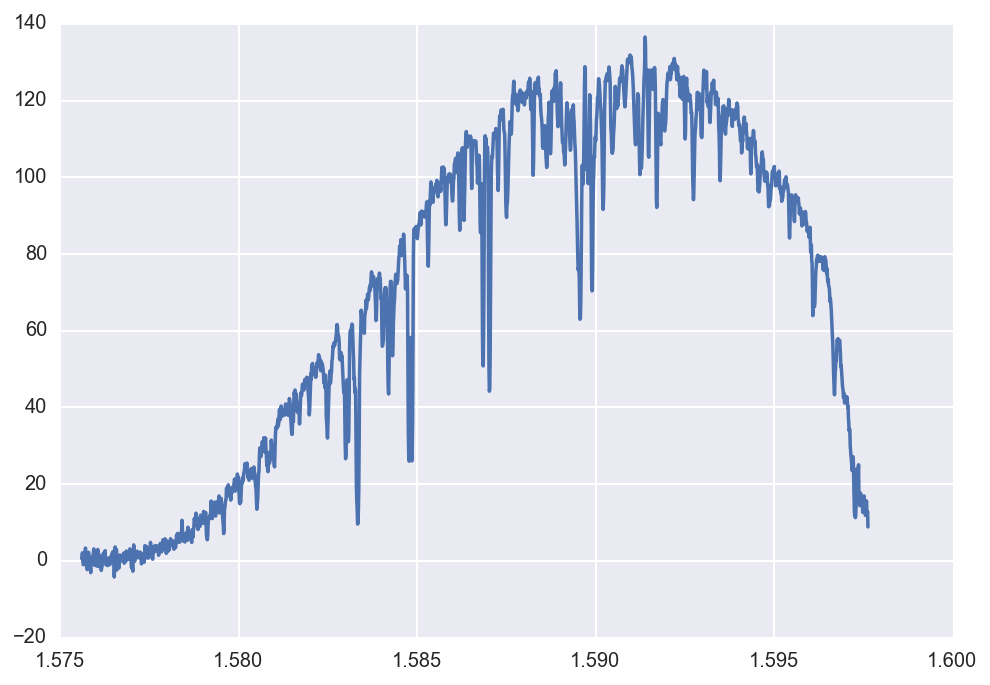

In [12]:
plt.plot(wavecut113,sncut113)
plt.show()

In [13]:
median_S_N113 = np.nanmedian(sncut113)
print("Median Signal to Noise Ratio of Order 113: {:0.1f} per pixel".format(median_S_N113))

Median Signal to Noise Ratio of Order 113: 86.7 per pixel


### Even without trimming noise, the median SN is almost 90, but with the other method it's only ~40

Same wavelength cut used in subsub_checking_new_data:

In [14]:
gi113 = (wavecut113 > 1.580) & (wavecut113 < 1.597)

In [15]:
wl_113 = wavecut113
fl_113 = fluxcut113
sn_113 = sncut113

In [16]:
fls_out113 = fl_113[gi113]
wls_out113 = wl_113[gi113]*10000.0
sn_out113 = sn_113[gi113]
msk_out113 = np.ones(len(wls_out113), dtype=int)

In [17]:
new_median_S_N113 = np.nanmedian(sn_out113)
print("Median Signal to Noise Ratio of Order 113: {:0.1f} per pixel".format(new_median_S_N113))

Median Signal to Noise Ratio of Order 113: 99.2 per pixel


### And now the SN is ~100, which is what I expected given the instrument performance. Should we calculate sigma directly from the SN vector?